# Test GEModelTools - HANK model with Capital

**Table of contents**<a id='toc0_'></a>    
- 1. [Stationary equilibrium](#toc1_)    
  - 1.1. [Policy functions](#toc1_1_)    
  - 1.2. [Distributions](#toc1_2_)    
  - 1.3. [MPCs](#toc1_3_)    
- 2. [Compute Jacobians](#toc2_)    
- 3. [Fiscal policy shock](#toc3_)    
  - 3.1. [NKPC](#toc3_1_)    
  - 3.2. [NKPCW](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKCapitalModel import HANKCapitalModelClass

## 1. <a id='toc1_'></a>[Stationary equilibrium](#toc0_)

In [2]:
model = HANKCapitalModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [4]:
par.beta_mean = 0.985
model.find_ss(do_print=True)

find beta for market clearing
 beta =   0.985000000000 -> ss.clearing_A = -16.563998652312 [5.5 secs]
 beta =   0.985000000000 -> ss.clearing_A = -16.563998652312 [0.8 secs]
 beta =   0.985000000000 -> ss.clearing_A = -16.563998652312 [0.8 secs]
 beta =   0.985000014678 -> ss.clearing_A = -16.563961280431 [0.8 secs]
 beta =   0.991505438518 -> ss.clearing_A = 478.794712731505 [1.3 secs]
 beta =   0.985217531402 -> ss.clearing_A = -15.968898254966 [0.8 secs]
 beta =   0.985217546083 -> ss.clearing_A = -15.968855099818 [0.8 secs]
 beta =   0.985311742097 -> ss.clearing_A = -15.682713160373 [0.9 secs]
 beta =   0.985500163489 -> ss.clearing_A = -15.048783371639 [1.1 secs]
 beta =   0.985877006272 -> ss.clearing_A = -13.460760078710 [1.0 secs]
 beta =   0.986630691837 -> ss.clearing_A =  -7.811914482721 [1.6 secs]
 beta =   0.987672980405 -> ss.clearing_A =  44.087152880414 [6.3 secs]
 beta =   0.986787578455 -> ss.clearing_A =  -5.790443350496 [1.6 secs]
 beta =   0.987236975461 -> ss.cle

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.5 secs
household problem simulated along transition in 1.4 secs



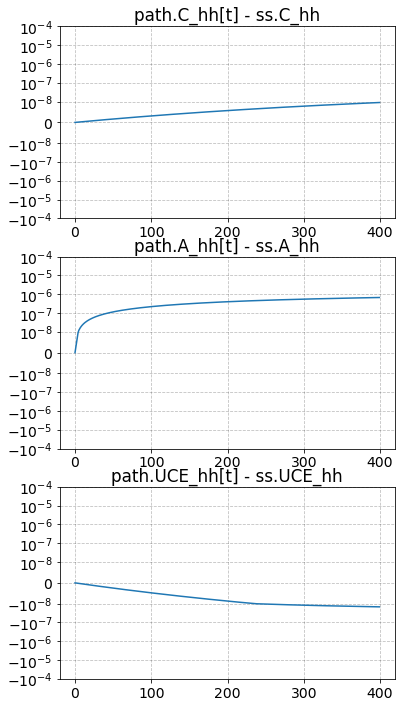

In [5]:
model.test_hh_path()

In [6]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  6.4e-14, max abs.  6.7e-07
clearing_Y     : t0 =  6.6e-14, max abs.  9.5e-09
Div_int        : t0 =  0.0e+00, max abs.  0.0e+00
Div_k          : t0 =  0.0e+00, max abs.  0.0e+00
Div            : t0 =  0.0e+00, max abs.  0.0e+00
eg             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
Ip             : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  0.0e+00
p_eq           : t0 =  0.0e+00, max abs.  0.0e+00
p_int          : t0 =  0.0e+00, max abs.  0.0e+00
p_k            : t0

### 1.1. <a id='toc1_1_'></a>[Policy functions](#toc0_)

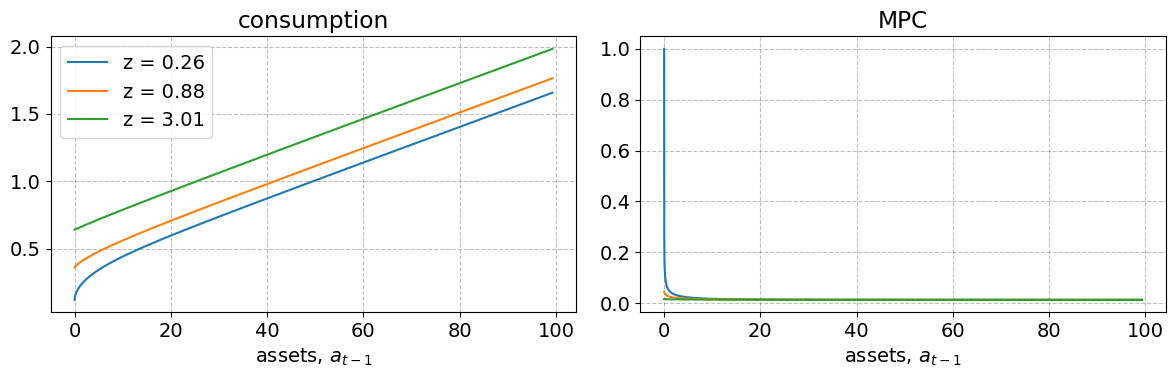

In [7]:
fig = plt.figure(figsize=(12,4),dpi=100)

a_max = 100

ax = fig.add_subplot(1,2,1)
ax.set_title('consumption')
for i_z in [0,par.Nz//2,par.Nz-1]:
    
    I = par.a_grid < 100
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'z = {par.z_grid[i_z]:.2f}')

ax.set_xlabel('assets, $a_{t-1}$')
ax.legend(frameon=True)

ax = fig.add_subplot(1,2,2)
ax.set_title('MPC')
for i_z in [0,par.Nz//2,par.Nz-1]:
    
    dc = (ss.c[0,i_z,1:]-ss.c[:,i_z,:-1])
    dm = (1+ss.ra)*(par.a_grid[1:]-par.a_grid[:-1])
    MPC = dc/dm

    I = par.a_grid[:-1] < 100

    ax.plot(par.a_grid[:-1][I],MPC.ravel()[I],label=f'z = {par.z_grid[i_z]:.2f}')

ax.set_xlabel('assets, $a_{t-1}$')
fig.tight_layout()

### 1.2. <a id='toc1_2_'></a>[Distributions](#toc0_)

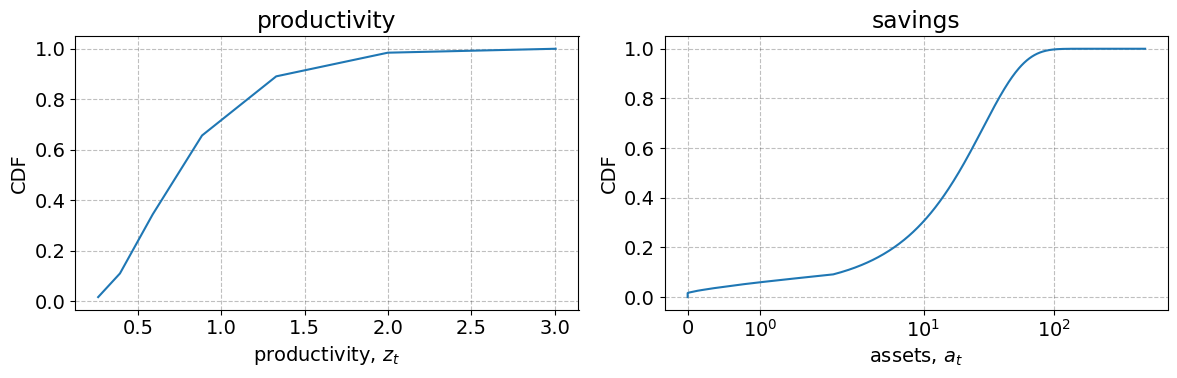

In [8]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. liquid assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

fig.tight_layout()

### 1.3. <a id='toc1_3_'></a>[MPCs](#toc0_)

In [9]:
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:,:,1:]-ss.c[:, :,:-1])
dm = (1+ss.ra)*(par.a_grid[1:]-par.a_grid[:-1])
MPC[:,:,:-1] = dc/dm
MPC[:,:,-1] = MPC[:,:,-2]
mean_MPC = np.sum(MPC*ss.D)
print(f'{mean_MPC = :.3f}')

mean_MPC = 0.028


## 2. <a id='toc2_'></a>[Compute Jacobians](#toc0_)

In [10]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 0.2 secs
curly_Y and curly_D calculated for ra              in 0.3 secs
curly_E calculated in 1.4 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 1.9 secs

full Jacobians:
full Jacobian to unknowns computed in 1.2 secs [in evaluate_path(): 0.4 secs]
full Jacobian to shocks computed in 0.6 secs [in evaluate_path(): 0.3 secs]


## 3. <a id='toc3_'></a>[Fiscal policy shock](#toc0_)

In [11]:
model.find_transition_path(do_print=True,do_end_check=False)

finding the transition path:
 it =   0 -> max. abs. error = 3.70e-03
   0.00e+00 in fisher_res
   0.00e+00 in w_res
   1.31e-03 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in NKPC_res
   3.70e-03 in NKPC_w_res
 it =   1 -> max. abs. error = 1.30e-05
   3.31e-10 in fisher_res
   2.69e-07 in w_res
   1.07e-06 in clearing_Y
   1.30e-05 in invest_res
   1.20e-18 in NKPC_res
   6.71e-06 in NKPC_w_res
 it =   2 -> max. abs. error = 5.75e-07
   8.20e-12 in fisher_res
   1.29e-10 in w_res
   4.93e-08 in clearing_Y
   5.75e-07 in invest_res
   7.86e-19 in NKPC_res
   1.75e-07 in NKPC_w_res
 it =   3 -> max. abs. error = 1.05e-08
   1.19e-13 in fisher_res
   3.30e-11 in w_res
   9.40e-10 in clearing_Y
   1.05e-08 in invest_res
   8.34e-19 in NKPC_res
   1.71e-09 in NKPC_w_res
 it =   4 -> max. abs. error = 8.20e-10
   3.11e-15 in fisher_res
   7.90e-13 in w_res
   3.09e-11 in clearing_Y
   8.20e-10 in invest_res
   8.59e-19 in NKPC_res
   5.91e-12 in NKPC_w_res
 it =   5 -> max. abs. err

### shocks ###


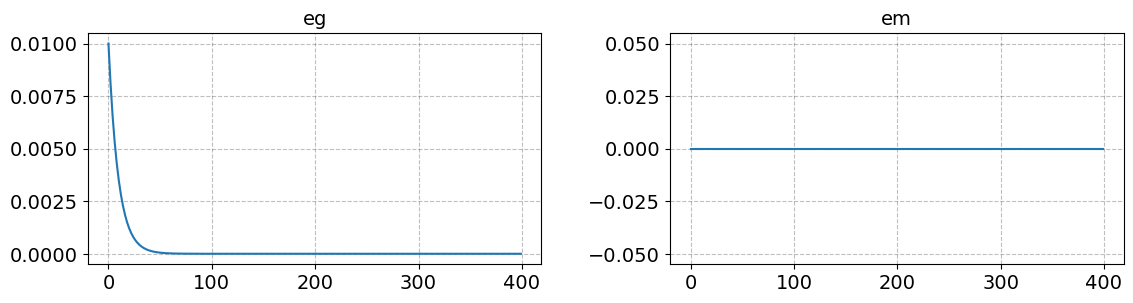


### varnames ###


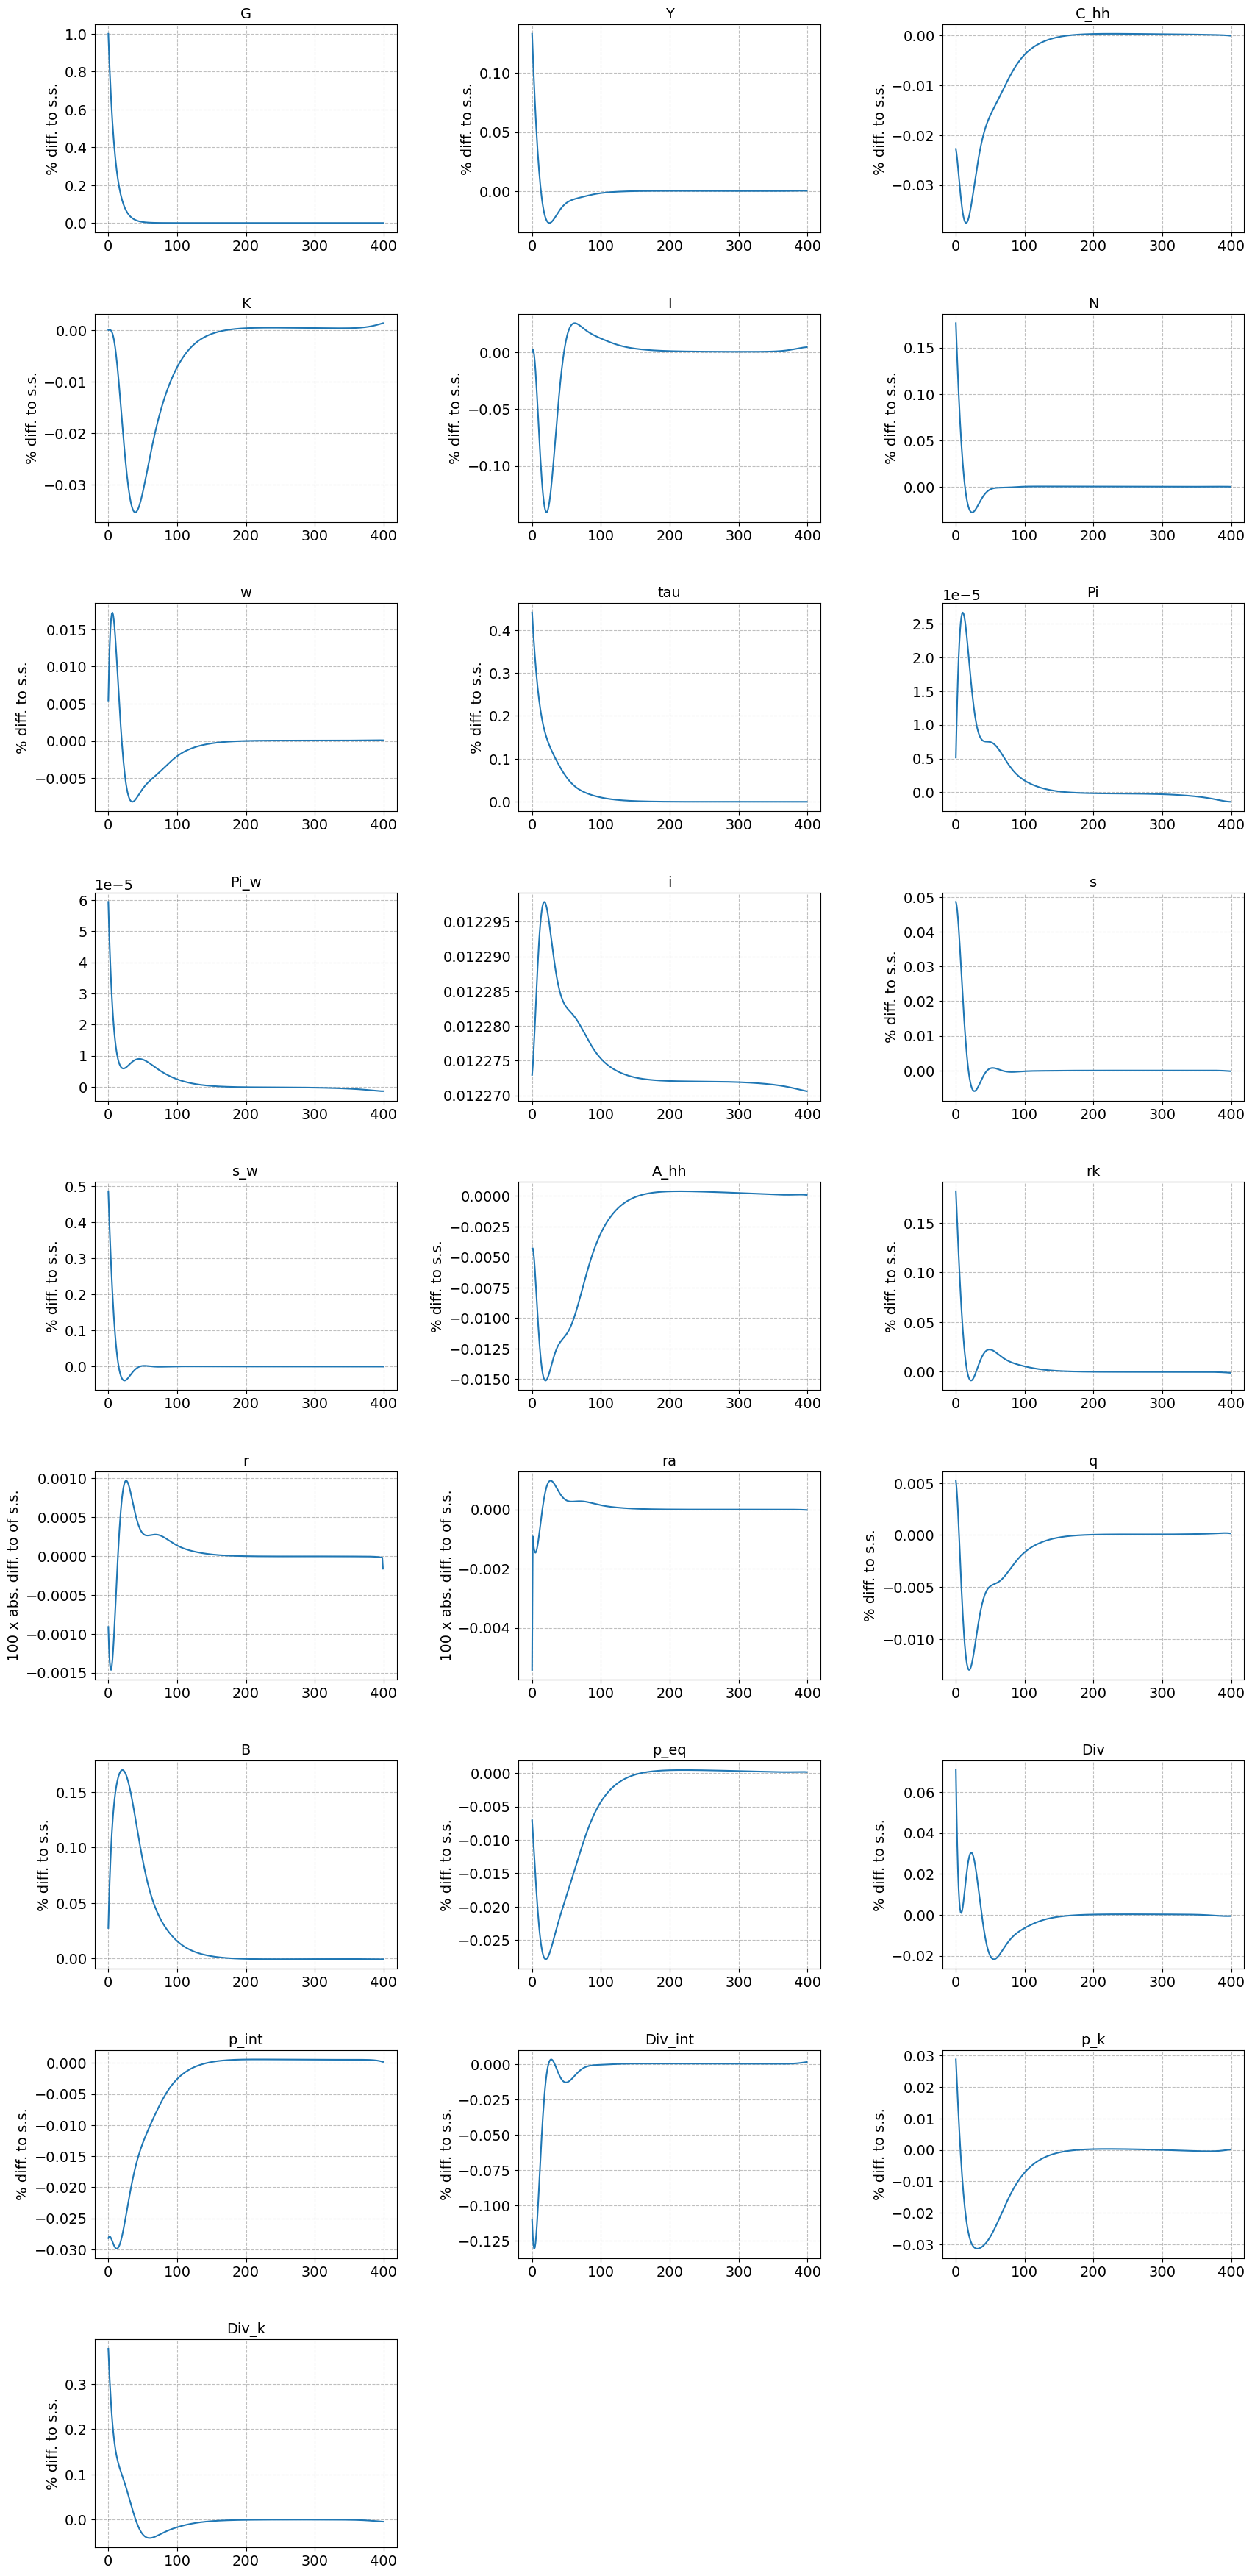


### tagets ###


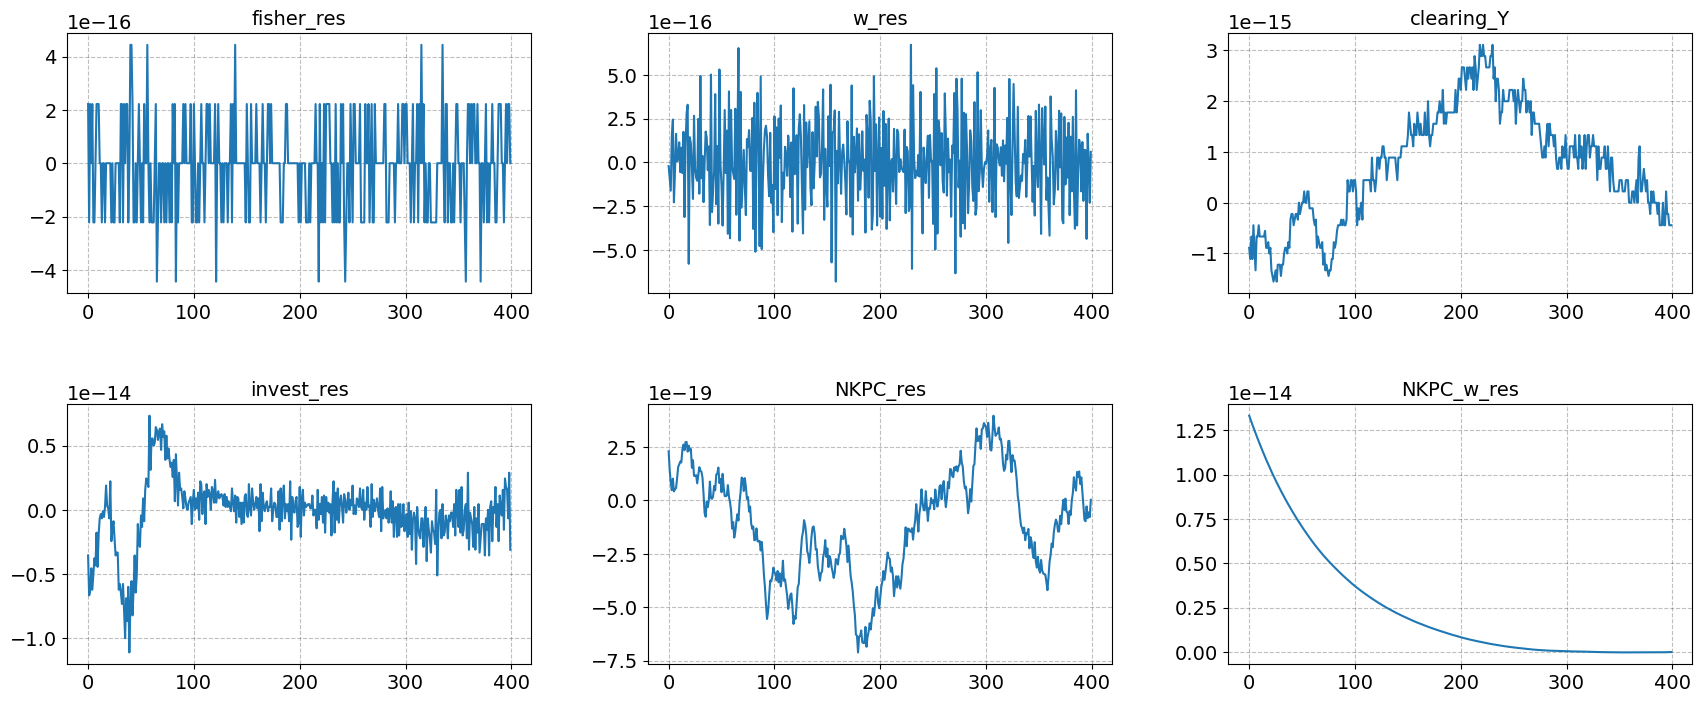

In [12]:
paths = ['G', 'Y', 'C_hh', 'K', 'I',
         'N', 'w', 'tau', 'Pi', 'Pi_w', 'i', 's', 's_w',
         'A_hh',
         'rk', 'r','ra',
         'q', 'B',
         'p_eq', 'Div', 'p_int', 'Div_int', 'p_k', 'Div_k']
paths_short = ['Y', 'C_hh', 'K', 'I', 'N', 'w']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}
# model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)
model.show_IRFs(paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3, do_shocks=True)

# Decompose sub-subblocks

### 3.1. <a id='toc3_1_'></a>[NKPC](#toc0_)

### varnames ###


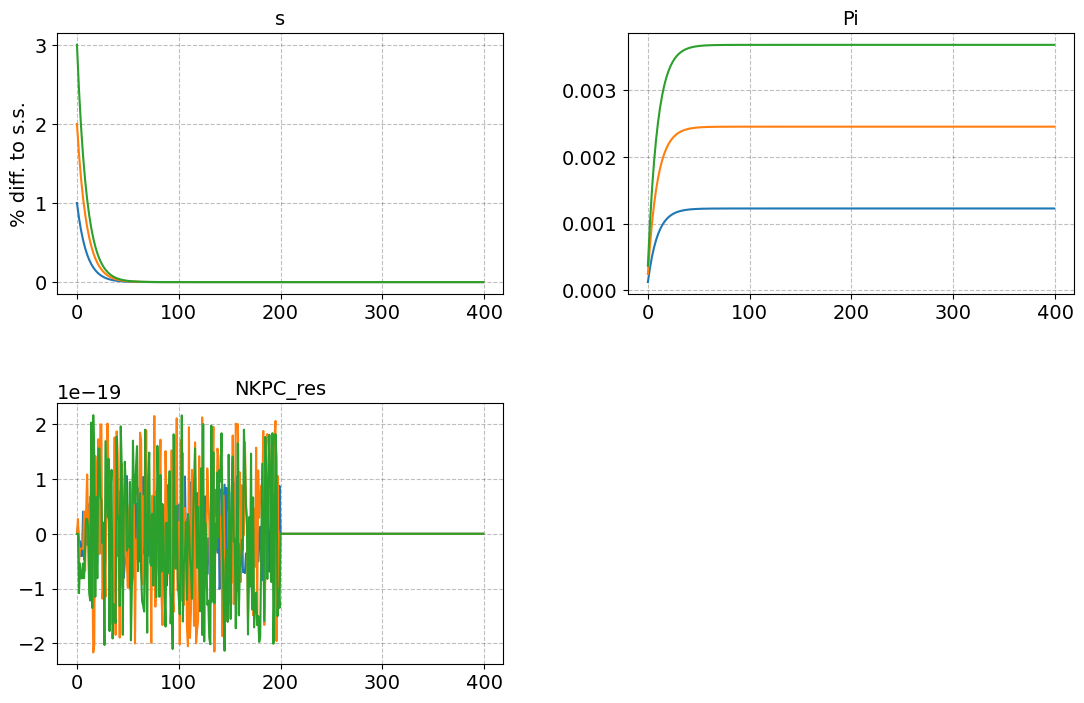

In [13]:
shock_specs = [{'ds':0.90**np.arange(par.T)*shockpct*ss.s} for shockpct in [0.01,0.02,0.03]]
paths = model.decompose_subblock(shock_specs,unknows=['Pi'],targets=['NKPC_res'],do_plot=True,lvl_value=['Pi'],ncols=2)

### 3.2. <a id='toc3_2_'></a>[NKPCW](#toc0_)

### varnames ###


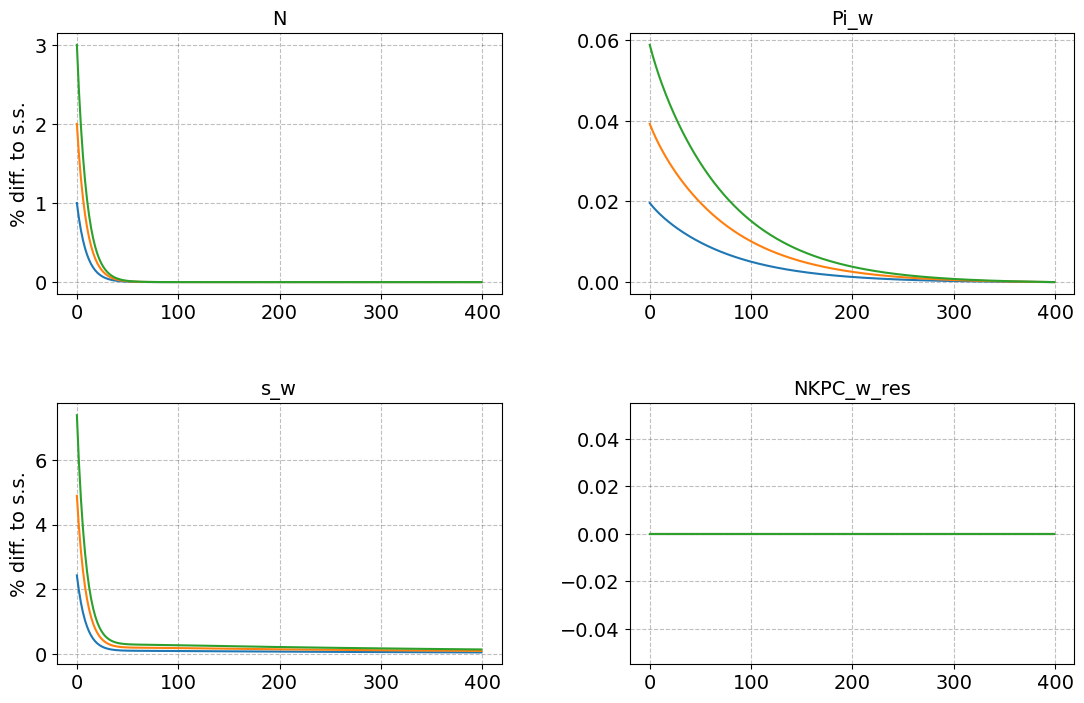

In [14]:
shock_specs = [{'dN':0.90**np.arange(par.T)*shockpct*ss.N} for shockpct in [0.01,0.02,0.03]]
paths = model.decompose_subblock(shock_specs,unknows=['Pi_w'],implied=['s_w'],targets=['NKPC_w_res'],do_plot=True,lvl_value=['Pi_w'],ncols=2)